In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matricesAleatorias import matwishart as ws

In [2]:
N = 1000
T = 10000

In [3]:
mat = ws.MatrizWishart((N,T))

In [4]:
densidad = ws.Densidades((N,T),1000,4)

# Matriz Grande

In [5]:
WSE = mat.WSE()

In [6]:
EvalsWSE = np.linalg.eigvalsh(WSE)

In [7]:
EvalsWSE = EvalsWSE[::2]

In [8]:
x, y = densidad.MarchenkoPastur()

In [9]:
rWSE= (EvalsWSE[1:-1] - EvalsWSE[2:]) / (EvalsWSE[:-2] - EvalsWSE[1:-1])

In [10]:
r = np.linspace(0,6,1000)
pr = densidad.Pr(r)

Text(0.5, 1.0, 'Distribución $ P(r) $')

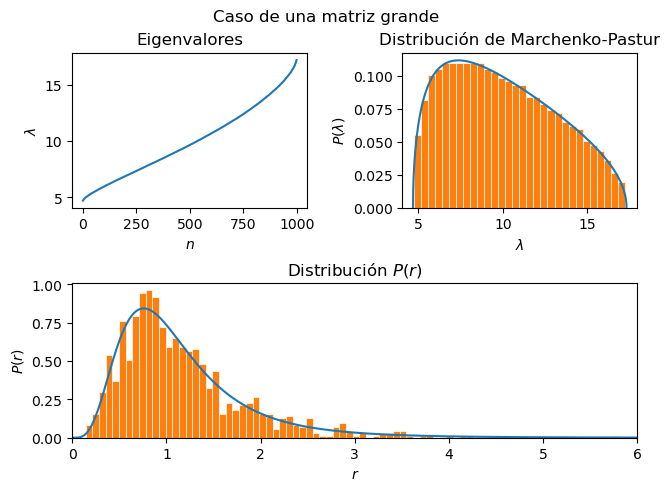

In [11]:
fig = plt.figure("""figsize=(12,10)""",layout="constrained")
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:])

fig.suptitle("Caso de una matriz grande")

ax1.plot(EvalsWSE / (4*N))
ax1.set_title("Eigenvalores")
ax1.set_xlabel(r"$ n $")
ax1.set_ylabel(r"$ \lambda $")

ax2.plot(x,y)
ax2.hist(EvalsWSE/(4*N),density=True,bins=30,linewidth=0.5,edgecolor="white")
ax2.set_xlabel(r"$ \lambda $")
ax2.set_ylabel(r"$ P(\lambda) $")
ax2.set_title("Distribución de Marchenko-Pastur")

ax3.plot(r,pr)
ax3.hist(rWSE,density=True,bins=100,linewidth=0.5,edgecolor="white")
ax3.set_xlim(0,6)
ax3.set_xlabel(r"$ r $")
ax3.set_ylabel(r"$ P(r) $")
ax3.set_title(r"Distribución $ P(r) $")

# Ensamble

In [17]:
nsamp = 100000
N = 100
T = 1000

In [18]:
ensWSE = ws.MatrizWishart((N,T))
EnsEvalWSE = []

In [19]:
for i in range(nsamp):
    WSE = ensWSE.WSE()
    eval = np.linalg.eigvalsh(WSE)
    EnsEvalWSE.append(eval)

In [20]:
EnsEvalWSE = np.concatenate(EnsEvalWSE)

In [21]:
np.savetxt("EvalEnsaWSE.dat",EnsEvalWSE, delimiter=" ")

In [26]:
EnsSinRep = []

for i in range(int(nsamp/N)):
    EvalSamp = EnsEvalWSE[0 + i*200:200 + i*200:2]
    EnsSinRep.append(EvalSamp)

In [27]:
EnsSinRep = np.concatenate(EnsSinRep)

In [30]:
rens = []

In [31]:
for i in range(int(nsamp/N)):
    EvalSamp = EnsSinRep[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [32]:
rens = np.concatenate(rens)

Text(0.5, 0, '$ r $')

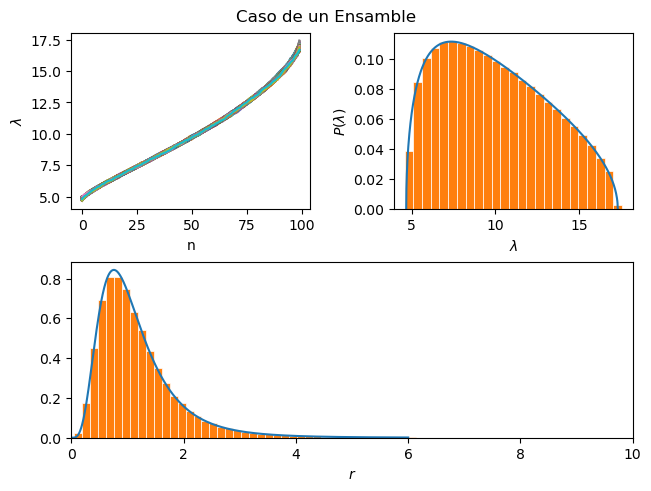

In [40]:
fig = plt.figure("""figsize=(12,10)""",layout="constrained")
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:])
fig.suptitle("Caso de un Ensamble")

for i in range(int(nsamp / N)):
    ax1.plot(EnsSinRep[0+ i*100:100 + i*100]/(4*N))

ax1.set_xlabel("n")
ax1.set_ylabel(r"$ \lambda $")

ax2.plot(x, y)
ax2.hist(EnsEvalWSE/(4*N), density=True, bins=25, linewidth=0.5, edgecolor="white")
ax2.set_xlabel(r"$ \lambda $")
ax2.set_ylabel(r"$ P(\lambda) $")

ax3.plot(r,pr)
ax3.hist(rens, density=True, bins=130, linewidth=0.5, edgecolor="white")
ax3.set_xlim(0,10)
ax3.set_xlabel(r"$ r $")